<a href="https://colab.research.google.com/github/RubenCedillo123/F-sica---UNAM/blob/main/Examen_Parcial_2_Compu_CedilloRuben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Examen parcial 2 (Tarea-examen)***
### Fisica computacional
**Profesor** : *Isaías Rodríguez Aguirre*  
**Ayudantes** : *Luis Enrique Guerra Camacho*, *David Angel De Jesus Luna*  
**Alumno** : *Ruben Eduardo Cedillo Salazar*


*Intrucciones* : Para el esta tarea examen dispondran de una semana para entregar lo resulto corriendo desde el dia en que se suba este.
Cada ejercicio se evaluara sobre 50/100.

# ***Librerias usadas***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ***Ejercicio 1: Visualización y exploración del conjunto de Mandelbrot***
El conjunto de Mandelbrot ($\mathcal{M}$) se define como el conjunto de puntos $c$ en el plano complejo para los cuales la órbita de la función iterativa cuadrática $z_{n+1} = z_n^2 + c$, con condición inicial $z_0 = 0$, permanece acotada.  

### ***1. Implementación del algoritmo de escape:***
* Escriba una función o procedimiento que tome como entrada un número complejo $c$ y un número máximo de iteraciones ($N_{\text{max}}$).
* La función debe iterar $z_{n+1} = z_n^2 + c$ hasta que $|z_n| > 2$ (criterio de escape) o hasta alcanzar $N_{\text{max}}$.
* El valor de retorno debe ser el número de iteraciones ($n$) realizadas antes del escape (o $N_{\text{max}}$ si no escapa).

In [ ]:
def esc_mandelbrot(c, N_max):
  #condiciones inciales y def de contadores
  z = 0 + 0j
  norma = 0
  i = 0
  #bucle condicional
  while i < N_max and norma < 2:
    z = z**2 + c
    norma = abs(z)
    i += 1
  return i

### ***2. Generación y gráfica del conjunto $\mathcal{M}$:***

* Fije un rango en el plano complejo (se sugiere $-2.0 \leq \text{Re}(c) \leq 1.0$ y $-1.5 \leq \text{Im}(c) \leq 1.5$) y defina una resolución de $N \times N$ puntos (por ejemplo, $N = 500$).

* Para cada punto $c$ de la cuadrícula, ejecute el algoritmo de escape con $N_{\text{max}} = 50$.

* Muestre explícitamente el conjunto $\mathcal{M}$ en una gráfica a color. Utilice una herramienta de visualización adecuada (por ejemplo, matplotlib.pyplot.imshow()) para representar los resultados, donde el color de cada píxel corresponda al número de iteraciones de escape.

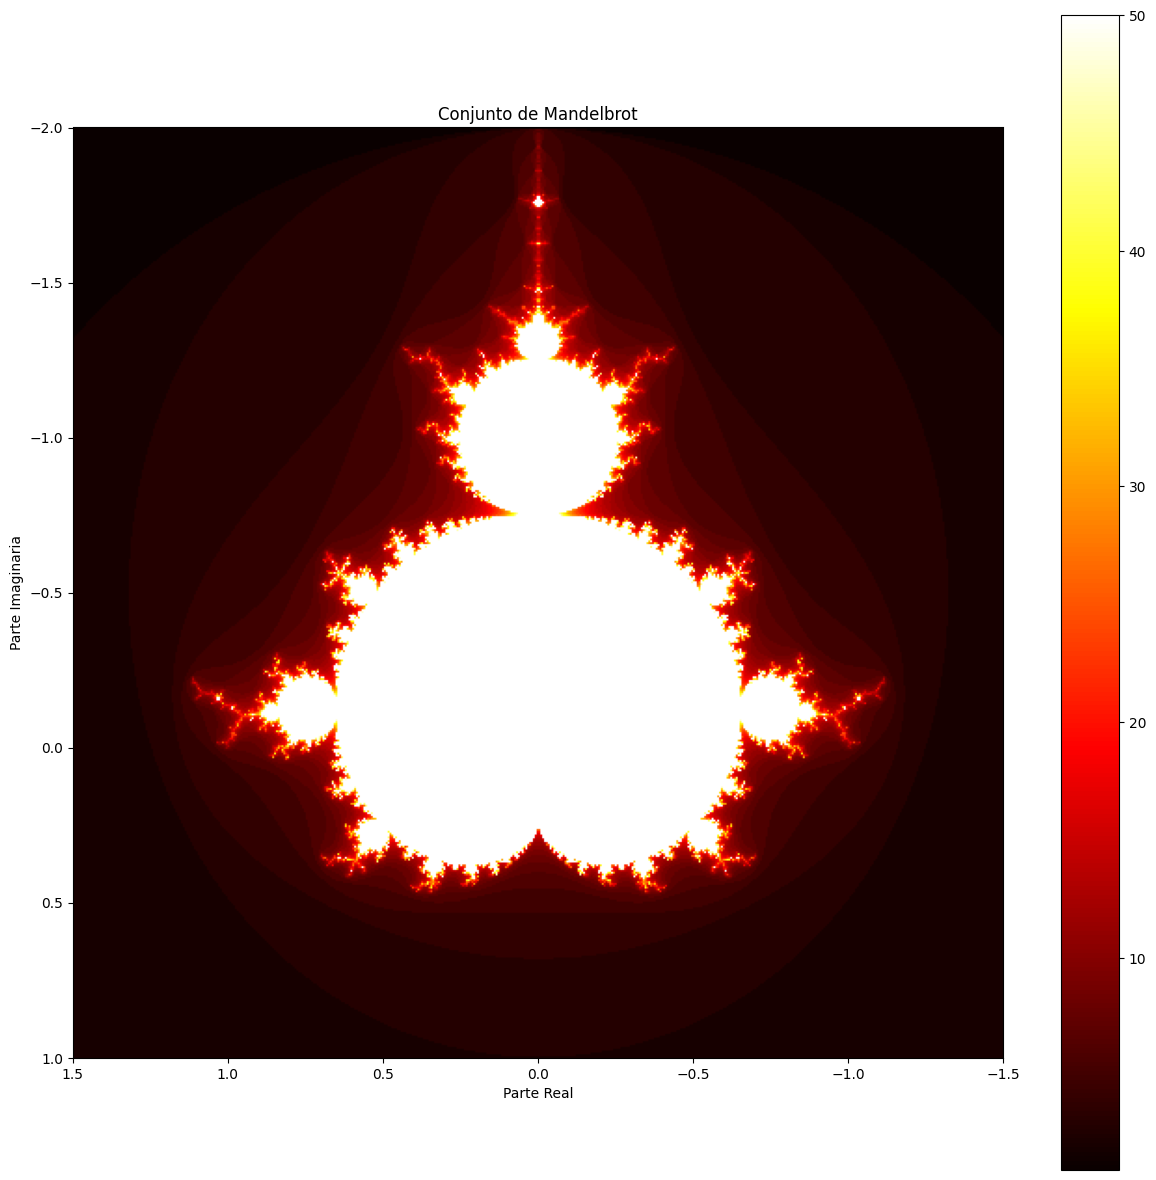

In [ ]:
#Definimos los rangos de la parte real y parte compleja de los elementos de c
Re=np.linspace(-2,1,500)
Im=np.linspace(-1.5,1.5,500)

#Matriz de ceros para el mapeo
mandelbrot = np.zeros((500,500))

#Llamamos al algortimo de escape
for i in range(len(Re)):
  for j in range(len(Im)):
    c=complex(Re[i],Im[j])
    mandelbrot[i,j]=esc_mandelbrot(c,50)

#Graficamos la salida de la función
plt.figure(figsize=(15,15))
plt.imshow(mandelbrot, cmap='hot', extent=[1.5, -1.5, 1, -2])
plt.title('Conjunto de Mandelbrot')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.colorbar()
plt.show()

# ***Ejercicio 2: Cálculo del área del conjunto de Mandelbrot por método numérico***

El cálculo analítico exacto del área ($\mathcal{A}$) del conjunto de Mandelbrot es un problema abierto. Por lo tanto, se recurrirá a un método numérico para estimar su valor.   

### ***1- Selección del método:***
* Seleccione un método numérico de integración o estimación de área de su agrado (por ejemplo, Monte Carlo, regla del trapecio o regla de Simpson aplicada a una discretización), visto en el curso.

### ***2- Cálculo del área***
* Defina la región acotada que contiene $\mathcal{M}$ y la función (o criterio) de prueba necesaria para su método.  
* Utilice el algoritmo de pertenencia al conjunto de Mandelbrot desarrollado en el Ejercicio 1 como parte esencial de su cálculo.  
* Implemente el método numérico seleccionado para obtener una estimación del área $\mathcal{A}$.

### ***Los métodos seleccionados son Monte-Carlo y por función de Heaviside***

#### ***Método de Monte-Carlo***

Área total del rectángulo contenedor: 9.0
Puntos totales generados: 100000
Puntos en el conjunto de Mandelbrot: 17505
Fracción de puntos en el conjunto: 0.175050
Área estimada del conjunto de Mandelbrot: 1.575450


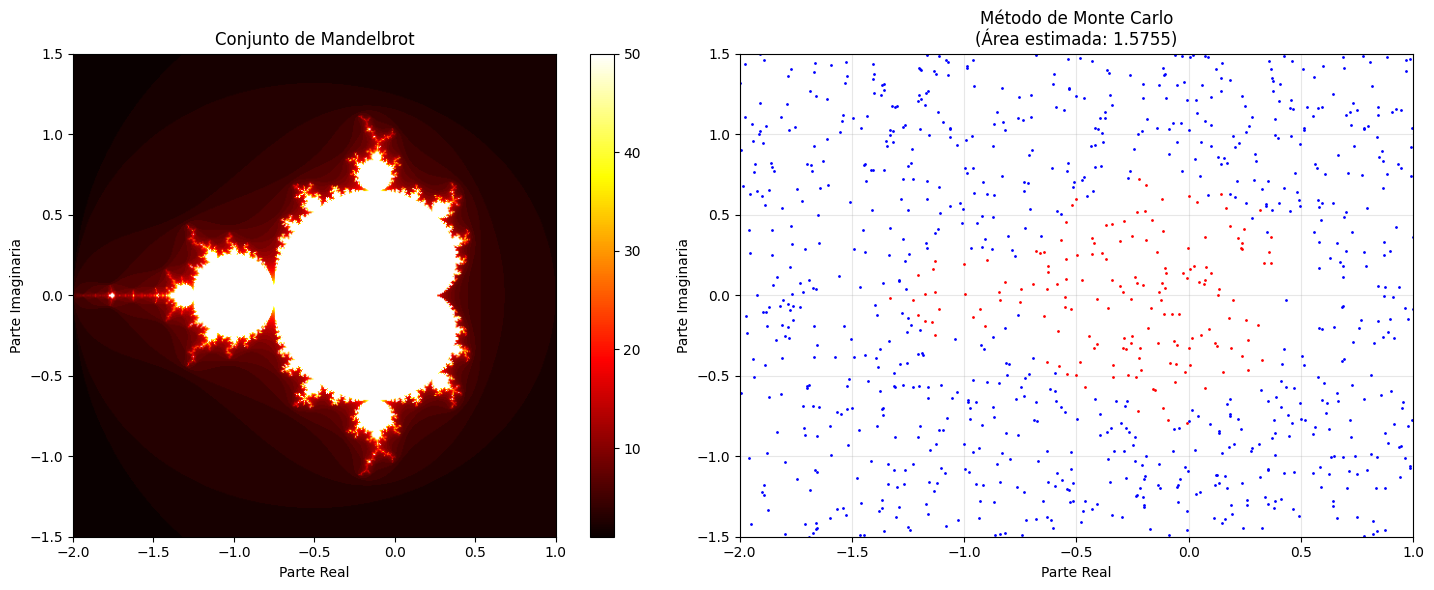


=== ANÁLISIS DE CONVERGENCIA ===
N =   1000: Área = 1.467000
N =   5000: Área = 1.576800
N =  10000: Área = 1.593000
N =  50000: Área = 1.578600
N = 100000: Área = 1.575450

Error relativo respecto al valor de referencia: 4.58%


In [ ]:
#Definimos los límites de los intervalos como variables
x_min, x_max = -2, 1
y_min, y_max = -1.5, 1.5

# Área total del rectángulo que contiene al conjunto
area_total = (x_max - x_min) * (y_max - y_min)
print(f"Área total del rectángulo contenedor: {area_total}")

# Definimos los parámetros del método de Monte Carlo
N_puntos = 100000  # Número de puntos aleatorios
N_max = 50         # Iteraciones máximas para el algoritmo de escape

# Generamos puntos aleatorios uniformemente distribuidos
puntos_reales = np.random.uniform(x_min, x_max, N_puntos)
puntos_imaginarios = np.random.uniform(y_min, y_max, N_puntos)

#Contador de puntos que pertenecen al conjunto de Mandelbrot
puntos_en_mandelbrot = 0

#Probar cada punto
for i in range(N_puntos):
    c = complex(puntos_reales[i], puntos_imaginarios[i])
    iteraciones = esc_mandelbrot(c, N_max)

    # Si el punto escapó (iteraciones < N_max), NO está en el conjunto
    # Si alcanzó N_max iteraciones sin escapar, SÍ está en el conjunto
    if iteraciones == N_max:
        puntos_en_mandelbrot += 1

#Calcular el área estimada
# El área es proporcional a la fracción de puntos que caen en el conjunto
area_estimada = (puntos_en_mandelbrot / N_puntos) * area_total

print(f"Puntos totales generados: {N_puntos}")
print(f"Puntos en el conjunto de Mandelbrot: {puntos_en_mandelbrot}")
print(f"Fracción de puntos en el conjunto: {puntos_en_mandelbrot/N_puntos:.6f}")
print(f"Área estimada del conjunto de Mandelbrot: {area_estimada:.6f}")

# comparamos graficas
Re = np.linspace(-2, 1, 500)
Im = np.linspace(-1.5, 1.5, 500)
mandelbrot = np.zeros((500, 500))

for i in range(len(Re)):
    for j in range(len(Im)):
        c = complex(Re[i], Im[j])
        mandelbrot[i, j] = esc_mandelbrot(c, 50)

plt.figure(figsize=(15, 6))

# Figura con las dos graficas
plt.subplot(1, 2, 1)
plt.imshow(mandelbrot.T, cmap='hot', extent=[-2, 1, -1.5, 1.5])
plt.title('Conjunto de Mandelbrot')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.colorbar()

#Puntos de Monte Carlo (muestra de 1000 puntos)
plt.subplot(1, 2, 2)
muestra = min(1000, N_puntos)
for i in range(muestra):
    c = complex(puntos_reales[i], puntos_imaginarios[i])
    iteraciones = esc_mandelbrot(c, N_max)
    color = 'red' if iteraciones == N_max else 'blue'
    plt.plot(puntos_reales[i], puntos_imaginarios[i], '.', color=color, markersize=2)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title(f'Método de Monte Carlo\n(Área estimada: {area_estimada:.4f})')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Convergencia")
# Probamos con diferentes números de puntos para ver la convergencia
puntos_prueba = [1000, 5000, 10000, 50000, 100000]
areas = []

for n in puntos_prueba:
    puntos_en_M = 0
    for i in range(n):
        c = complex(puntos_reales[i], puntos_imaginarios[i])
        if esc_mandelbrot(c, N_max) == N_max:
            puntos_en_M += 1
    area = (puntos_en_M / n) * area_total
    areas.append(area)
    print(f"N = {n:6d}: Área = {area:.6f}")

# Valor de referencia (aproximado conocido)
area_referencia = 1.506484  # Valor aproximado conocido del área del conjunto de Mandelbrot
error_relativo = abs(area_estimada - area_referencia) / area_referencia * 100
print(f"\nError relativo respecto al valor de referencia: {error_relativo:.2f}%")

#### ***Método por función de Heaviside***

Resolución de la imagen: (500, 500)
Total de píxeles: 250000
Píxeles en el conjunto de Mandelbrot: 44056
Fracción de píxeles en el conjunto: 0.176224

Área total del rectángulo contenedor: 9.0 unidades²
Área del conjunto de Mandelbrot: 1.586016 unidades²


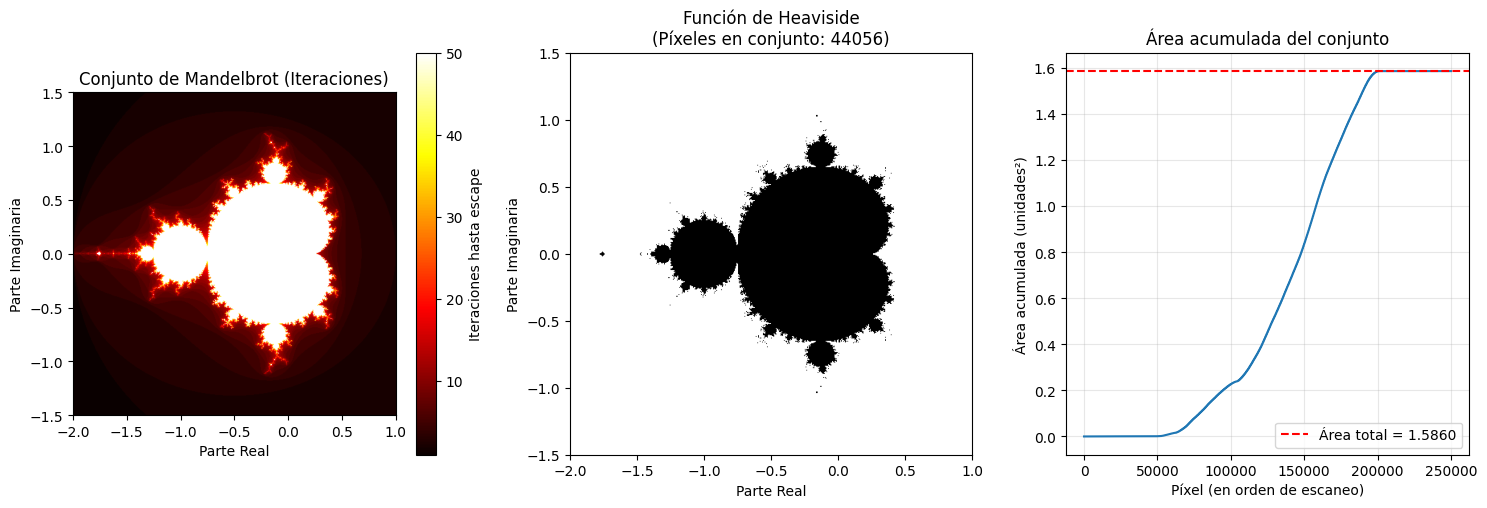

Resolución 100x100: Área = 1.564200 unidades² ( 1738 píxeles)
Resolución 200x200: Área = 1.573200 unidades² ( 6992 píxeles)
Resolución 500x500: Área = 1.586016 unidades² (44056 píxeles)
Resolución 800x800: Área = 1.585716 unidades² (112762 píxeles)

Error relativo respecto al valor de referencia: 5.28%


In [ ]:
#Función de Heaviside (criterio de pertenencia)
# Un punto pertenece al conjunto si alcanzó las 50 iteraciones sin escapar
def heaviside_mandelbrot(iteraciones, max_iter=50):
    return 1 if iteraciones == max_iter else 0

# Aplicar la función de Heaviside a toda la matriz
mandelbrot_binario = np.vectorize(heaviside_mandelbrot)(mandelbrot)

# 3. Contar píxeles que pertenecen al conjunto
pixeles_en_conjunto = np.sum(mandelbrot_binario)
total_pixeles = mandelbrot_binario.size

print(f"Resolución de la imagen: {mandelbrot_binario.shape}")
print(f"Total de píxeles: {total_pixeles}")
print(f"Píxeles en el conjunto de Mandelbrot: {pixeles_en_conjunto}")
print(f"Fracción de píxeles en el conjunto: {pixeles_en_conjunto/total_pixeles:.6f}")

#Calculamos el área escalando
# Dimensiones del rectángulo en el plano complejo
ancho_real = 1 - (-2)   # 3 unidades
alto_imaginario = 1.5 - (-1.5)  # 3 unidades

# Área total del rectángulo en el plano complejo
area_total_plano = ancho_real * alto_imaginario  # 9 unidades²

# Área del conjunto de Mandelbrot
area_mandelbrot = (pixeles_en_conjunto / total_pixeles) * area_total_plano

print(f"\nÁrea total del rectángulo contenedor: {area_total_plano} unidades²")
print(f"Área del conjunto de Mandelbrot: {area_mandelbrot:.6f} unidades²")


plt.figure(figsize=(15, 5))
#Conjunto de Mandelbrot original
plt.subplot(1, 3, 1)
plt.imshow(mandelbrot.T, cmap='hot', extent=[-2, 1, -1.5, 1.5])
plt.title('Conjunto de Mandelbrot (Iteraciones)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.colorbar(label='Iteraciones hasta escape')

#Representación binaria (Heaviside)
plt.subplot(1, 3, 2)
plt.imshow(mandelbrot_binario.T, cmap='binary', extent=[-2, 1, -1.5, 1.5])
plt.title(f'Función de Heaviside\n(Píxeles en conjunto: {pixeles_en_conjunto})')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')

# área por píxel
plt.subplot(1, 3, 3)

# Calcular el área que representa cada píxel
area_por_pixel = area_total_plano / total_pixeles

# Creamos la matriz de áreas acumulativas
areas_acumulativas = np.cumsum(mandelbrot_binario) * area_por_pixel

plt.plot(areas_acumulativas)
plt.axhline(y=area_mandelbrot, color='r', linestyle='--',
           label=f'Área total = {area_mandelbrot:.4f}')
plt.title('Área acumulada del conjunto')
plt.xlabel('Píxel (en orden de escaneo)')
plt.ylabel('Área acumulada (unidades²)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

resoluciones = [100, 200, 500, 800]
areas_por_resolucion = []

for resolucion in resoluciones:
    Re_temp = np.linspace(-2, 1, resolucion)
    Im_temp = np.linspace(-1.5, 1.5, resolucion)

    mandelbrot_temp = np.zeros((resolucion, resolucion))

    for i in range(len(Re_temp)):
        for j in range(len(Im_temp)):
            c = complex(Re_temp[i], Im_temp[j])
            mandelbrot_temp[i, j] = esc_mandelbrot(c, 50)

    # Aplicar Heaviside
    mandelbrot_bin_temp = np.vectorize(heaviside_mandelbrot)(mandelbrot_temp)
    pixeles_en_conjunto_temp = np.sum(mandelbrot_bin_temp)

    area_temp = (pixeles_en_conjunto_temp / mandelbrot_bin_temp.size) * area_total_plano
    areas_por_resolucion.append(area_temp)

    print(f"Resolución {resolucion:3d}x{resolucion:3d}: "
          f"Área = {area_temp:.6f} unidades² "
          f"({pixeles_en_conjunto_temp:5d} píxeles)")

# Valor de referencia
area_referencia = 1.506484
error_relativo = abs(area_mandelbrot - area_referencia) / area_referencia * 100
print(f"\nError relativo respecto al valor de referencia: {error_relativo:.2f}%")

### ***3- Área aproximada***
* El área aproximada es de 1.575450 con un error del 4.58%, siendo el método de Monte-Carlo el que mejor se pudo implementar/con mejores resultados.